In [1]:
import numpy as np
import pylab as py
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
import decimal
from pdf2image import convert_from_path # convert pdf to png

In [99]:
saveFig = False

In [3]:
RbFe_Per = [-0.442,-0.206,-0.016,0.288,0.622] # 2.5%, 16%, 50%, 84%, 97.5%
RbZr_Per = [-0.667,-0.348,-0.112,0.098,0.418]

In [4]:
f_RbFe = './RbFe_DataSet.csv'
f_RbZr = './RbZr_DataSet.csv'

In [5]:
RbFe_data = pd.read_csv(f_RbFe,index_col=False)
RbZr_data = pd.read_csv(f_RbZr,index_col=False)

In [6]:
RbFe_data

,Red_x,Red_y,Green_x,Green_y,Yellow_x,Yellow_y,Brown_x,Brown_y,Blue_x,Blue_y,Pink_x,Pink_y,Purple_x,Purple_y,Gray_x,Gray_y,Orange_x,Orange_y
0,5.0,0.7429,5.0,0.9536,3.0,0.1500,4.0,0.0214,5.0,0.0964,4.50,0.1143,4.0,0.0107,4.0,0.1286,5.0,0.3750
1,6.0,1.1500,6.0,1.3321,4.0,0.8821,5.0,0.3250,6.0,0.1893,4.75,0.1393,5.0,0.0464,5.0,0.0643,6.0,0.4071
2,7.0,1.0214,7.0,1.2536,5.0,0.8500,6.0,0.7250,7.0,0.2643,5.00,0.1679,6.0,0.2107,6.0,0.0429,7.0,0.5357
3,NaN,NaN,NaN,NaN,NaN,NaN,6.5,1.0321,8.0,0.3607,5.50,0.2321,6.5,0.2571,NaN,NaN,8.0,0.7929
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.4571,6.00,0.0786,NaN,NaN,NaN,NaN,9.0,0.8929
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,0.2107,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00,0.3750,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
RbZr_data

,Red_x,Red_y,Green_x,Green_y,Yellow_x,Yellow_y,Brown_x,Brown_y,Blue_x,Blue_y,Pink_x,Pink_y,Purple_x,Purple_y,Gray_x,Gray_y,Orange_x,Orange_y
0,5.0,0.5197,5.0,0.3820,3.0,-0.1174,4.0,-0.0034,5.0,0.1657,4.50,0.0949,4.0,0.0006,4.0,-0.2944,5.0,-0.4556
1,6.0,0.5197,6.0,0.4292,4.0,0.3702,5.0,0.1657,6.0,0.2326,4.75,0.1225,5.0,0.0281,5.0,-0.1056,6.0,-0.1449
2,7.0,0.5000,7.0,0.4410,5.0,0.3191,6.0,0.2640,7.0,0.2798,5.00,0.1461,6.0,0.1421,6.0,-0.0309,7.0,0.0045
3,NaN,NaN,NaN,NaN,NaN,NaN,6.5,0.3034,8.0,0.3348,5.50,0.1972,6.5,0.1618,NaN,NaN,8.0,0.1107
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,0.2876,6.00,0.0713,NaN,NaN,NaN,NaN,9.0,0.2955
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.00,0.1775,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.00,0.2994,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
fe_red_x = [x for x in RbFe_data.Red_x if math.isnan(x)==False]
fe_red_y = [x for x in RbFe_data.Red_y if math.isnan(x)==False]
fe_green_x = [x for x in RbFe_data.Green_x if math.isnan(x)==False]
fe_green_y = [x for x in RbFe_data.Green_y if math.isnan(x)==False]
fe_yellow_x = [x for x in RbFe_data.Yellow_x if math.isnan(x)==False]
fe_yellow_y = [x for x in RbFe_data.Yellow_y if math.isnan(x)==False]
fe_brown_x = [x for x in RbFe_data.Brown_x if math.isnan(x)==False]
fe_brown_y = [x for x in RbFe_data.Brown_y if math.isnan(x)==False]
fe_blue_x = [x for x in RbFe_data.Blue_x if math.isnan(x)==False]
fe_blue_y = [x for x in RbFe_data.Blue_y if math.isnan(x)==False]
fe_pink_x = [x for x in RbFe_data.Pink_x if math.isnan(x)==False]
fe_pink_y = [x for x in RbFe_data.Pink_y if math.isnan(x)==False]
fe_purple_x = [x for x in RbFe_data.Purple_x if math.isnan(x)==False]
fe_purple_y = [x for x in RbFe_data.Purple_y if math.isnan(x)==False]
fe_gray_x = [x for x in RbFe_data.Gray_x if math.isnan(x)==False]
fe_gray_y = [x for x in RbFe_data.Gray_y if math.isnan(x)==False]
fe_orange_x = [x for x in RbFe_data.Orange_x if math.isnan(x)==False]
fe_orange_y = [x for x in RbFe_data.Orange_y if math.isnan(x)==False]

zr_red_x = [x for x in RbZr_data.Red_x if math.isnan(x)==False]
zr_red_y = [x for x in RbZr_data.Red_y if math.isnan(x)==False]
zr_green_x = [x for x in RbZr_data.Green_x if math.isnan(x)==False]
zr_green_y = [x for x in RbZr_data.Green_y if math.isnan(x)==False]
zr_yellow_x = [x for x in RbZr_data.Yellow_x if math.isnan(x)==False]
zr_yellow_y = [x for x in RbZr_data.Yellow_y if math.isnan(x)==False]
zr_brown_x = [x for x in RbZr_data.Brown_x if math.isnan(x)==False]
zr_brown_y = [x for x in RbZr_data.Brown_y if math.isnan(x)==False]
zr_blue_x = [x for x in RbZr_data.Blue_x if math.isnan(x)==False]
zr_blue_y = [x for x in RbZr_data.Blue_y if math.isnan(x)==False]
zr_pink_x = [x for x in RbZr_data.Pink_x if math.isnan(x)==False]
zr_pink_y = [x for x in RbZr_data.Pink_y if math.isnan(x)==False]
zr_purple_x = [x for x in RbZr_data.Purple_x if math.isnan(x)==False]
zr_purple_y = [x for x in RbZr_data.Purple_y if math.isnan(x)==False]
zr_gray_x = [x for x in RbZr_data.Gray_x if math.isnan(x)==False]
zr_gray_y = [x for x in RbZr_data.Gray_y if math.isnan(x)==False]
zr_orange_x = [x for x in RbZr_data.Orange_x if math.isnan(x)==False]
zr_orange_y = [x for x in RbZr_data.Orange_y if math.isnan(x)==False]

In [9]:
RbFe_file = '~/Software/nucleo/Richard/MCNucleo_Xlast70/RbFe_data.dat'
RbZr_file = '~/Software/nucleo/Richard/MCNucleo_Xlast70/RbZr_data.dat'

In [10]:
RbFe_abunds = pd.read_table(RbFe_file,header=None)
RbZr_abunds = pd.read_table(RbZr_file,header=None)

In [11]:
RbFe_abunds.head(5)

,0
0,0.328467
1,-0.126495
2,-0.310409
3,-0.028558
4,-0.482211


In [12]:
RbZr_abunds.head(5)

,0
0,0.076978
1,-0.095134
2,-0.330112
3,-0.219281
4,-0.621847


In [13]:
RbFe_abunds[0][0]

0.328466813073657

In [14]:
RbFe_abunds = [x for x in RbFe_abunds[0] if math.isnan(x)==False]
RbZr_abunds = [x for x in RbZr_abunds[0] if math.isnan(x)==False]

In [15]:
len(RbZr_abunds)

50000

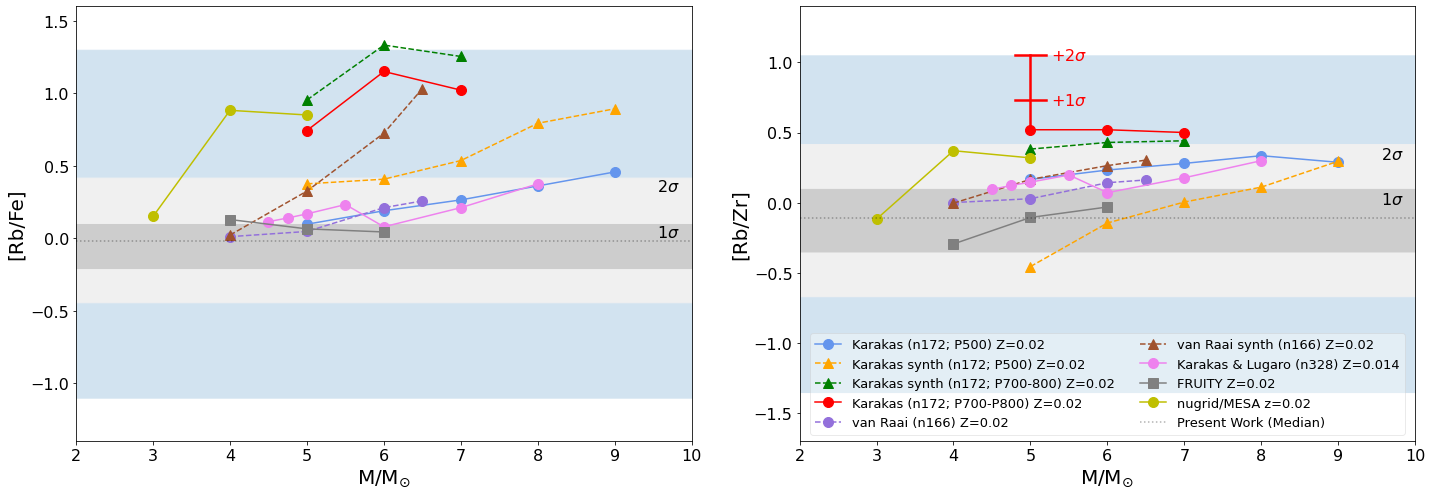

In [100]:
# 2 subplots
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 2) # 1x2 grid)
gs.update(wspace=0.175) # Add spacing in the middle
alpha_med = 0.3
#alpha_1s = 0.5
alpha_1s = 0.3
alpha_2s = 0.3
plt.rcParams["figure.figsize"] = (24,8)
color_2s = [(240/255,240/255,240/255)]
color_1s = [(205/255,205/255,205/255)]

###########################################################################################
ax = plt.subplot(gs[0, 0])

plt.plot(fe_blue_x, fe_blue_y, c = 'cornflowerblue', marker = 'o', markersize=10)
plt.plot(fe_orange_x, fe_orange_y, c = 'orange', marker = '^', markersize=10, ls = '--')
plt.plot(fe_green_x, fe_green_y, c = 'g', marker = '^', markersize=10, ls = '--')
plt.plot(fe_red_x, fe_red_y, c = 'r', marker = 'o', markersize=10)
plt.plot(fe_purple_x, fe_purple_y, c = 'mediumpurple', marker = 'o', markersize=10, ls = '--')
plt.plot(fe_brown_x, fe_brown_y, c = 'sienna', marker = '^', markersize=10, ls = '--')
plt.plot(fe_pink_x, fe_pink_y, c = 'violet', marker = 'o', markersize=10)
plt.plot(fe_gray_x, fe_gray_y, c = 'gray', marker = 's', markersize=10)
plt.plot(fe_yellow_x, fe_yellow_y, c = 'y', marker = 'o', markersize=10)
fill_x = np.arange(1.0, 11, 0.01)
plt.fill_between(fill_x, -1.1, 1.3, color = [(210/255,227/255,240/255)])
plt.fill_between(fill_x, RbFe_Per[0], RbZr_Per[4], color = color_2s) # 2s
plt.fill_between(fill_x, RbFe_Per[1], RbZr_Per[3], color = color_1s) # 1s
plt.axhline(y = RbFe_Per[2], c = 'k', ls = ':', alpha=alpha_med)
#plt.axhline(y = RbFe_Per[1], c = 'k', ls = ':', alpha=alpha_1s)
#plt.axhline(y = RbFe_Per[3], c = 'k', ls = ':', alpha=alpha_1s)
#plt.axhline(y = RbFe_Per[0], c = 'k', ls = ':', alpha=alpha_2s)
#plt.axhline(y = RbFe_Per[4], c = 'k', ls = ':', alpha=alpha_2s)
plt.text(9.7,0.325,r'$2\sigma$',fontsize=16, ha='center')
#plt.text(9.7,-0.4,r'$-2\sigma$',fontsize=16, ha='center')
plt.text(9.7,0.005,r'$1\sigma$',fontsize=16, ha='center')
#plt.text(9.7,-0.15,r'$-1\sigma$',fontsize=16, ha='center')
#plt.text(9.5,0.02,'median',fontsize=16, ha='center')

#plt.hist(RbFe_abunds, orientation='horizontal', density=False, weights=np.ones_like(RbFe_abunds) / 1820,
#         bottom=2, bins=30, histtype='step', linewidth = 2.5, color = 'black', alpha=0.2)

ax.set_xlabel(r'$\mathrm{M}/\mathrm{M}_{\odot}$', size = 20)
ax.set_ylabel('[Rb/Fe]', size = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(2,10)
plt.ylim(-1.4, 1.6)
#ax.semilogy()
#plt.grid(True, which = 'both')

#ax2 = ax.twiny()
#plt.yticks(fontsize=16)
#plt.hist(RbFe_abunds, orientation='horizontal', density=False,# weights=np.ones_like(RbFe_abunds) / 1820,
#         bottom=2, bins=30, histtype='step', linewidth = 2.5, color = 'black', alpha=0.2)
#ax2.set_xlabel('Counts', size = 20, labelpad=10)
#plt.xticks(fontsize=16)

############################################################################################

ax = plt.subplot(gs[0, 1])

ax.plot(zr_blue_x, zr_blue_y, c = 'cornflowerblue', marker = 'o', markersize=10, label = 'Karakas (n172; P500) Z=0.02')
plt.plot(zr_orange_x, zr_orange_y, c = 'orange', marker = '^', markersize=10, ls = '--', label = 'Karakas synth (n172; P500) Z=0.02')
plt.plot(zr_green_x, zr_green_y, c = 'g', marker = '^', markersize=10, ls = '--', label = 'Karakas synth (n172; P700-800) Z=0.02')
plt.plot(zr_red_x, zr_red_y, c = 'r', marker = 'o', markersize=10, label = 'Karakas (n172; P700-P800) Z=0.02')
plt.plot(zr_purple_x, zr_purple_y, c = 'mediumpurple', marker = 'o', markersize=10, ls = '--', label = 'van Raai (n166) Z=0.02')
plt.plot(zr_brown_x, zr_brown_y, c = 'sienna', marker = '^', markersize=10, ls = '--', label = 'van Raai synth (n166) Z=0.02')
plt.plot(zr_pink_x, zr_pink_y, c = 'violet', marker = 'o', markersize=10, label = 'Karakas & Lugaro (n328) Z=0.014')
plt.plot(zr_gray_x, zr_gray_y, c = 'gray', marker = 's', markersize=10, label = 'FRUITY Z=0.02')
plt.plot(zr_yellow_x, zr_yellow_y, c = 'y', marker = 'o', markersize=10, label = 'nugrid/MESA z=0.02')
plt.fill_between(fill_x, -1.35, 1.05, color = [(210/255,227/255,240/255)])
plt.fill_between(fill_x, RbZr_Per[0], RbZr_Per[4], color = color_2s) # 2s
plt.fill_between(fill_x, RbZr_Per[1], RbZr_Per[3], color = color_1s) # 1s
plt.axhline(y = RbZr_Per[2], c = 'k', ls = ':', alpha=alpha_med, label = 'Present Work (Median)')
#plt.axhline(y = RbZr_Per[1], c = 'k', ls = ':', alpha=alpha_1s)
#plt.axhline(y = RbZr_Per[3], c = 'k', ls = ':', alpha=alpha_1s)
#plt.axhline(y = RbZr_Per[0], c = 'k', ls = ':', alpha=alpha_2s)
#plt.axhline(y = RbZr_Per[4], c = 'k', ls = ':', alpha=alpha_2s)
plt.text(9.7,0.31,r'$2\sigma$',fontsize=16, ha='center')
#plt.text(9.7,-0.62,r'$-2\sigma$',fontsize=16, ha='center')
plt.text(9.7,-0.0105,r'$1\sigma$',fontsize=16, ha='center')
#plt.text(9.7,-0.3,r'$-1\sigma$',fontsize=16, ha='center')
#plt.text(9.5,-0.07,'median',fontsize=16, ha='center')

#plt.axhline(y = (RbZr_Per[3] - RbZr_Per[2]) + 0.52, c = 'k', ls = ":", alpha=alpha_2s)
#plt.axhline(y = (RbZr_Per[4] - RbZr_Per[2]) + 0.52, c = 'k', ls = ":", alpha=alpha_2s)
red_max = 0.52
red_plus1sig = RbZr_Per[3] - RbZr_Per[2] + red_max
red_plus2sig = RbZr_Per[4] - RbZr_Per[2] + red_max
yl_min = -1.7
yl_max = 1.4
xl_min = 2
xl_max = 10
red_max_x = 5
plt.axvline(x = red_max_x, c = 'red', linewidth = 2.5, ymin = (red_max-yl_min)/(yl_max-yl_min), ymax = (red_plus2sig-yl_min)/(yl_max-yl_min))
plt.axhline(y = red_plus1sig, c ='red', linewidth = 2.5, xmin = (red_max_x - 0.2 - xl_min)/(xl_max-xl_min), xmax = (red_max_x + 0.2 - xl_min)/(xl_max-xl_min))
plt.axhline(y = red_plus2sig, c ='red', linewidth = 2.5, xmin = (red_max_x - 0.2 - xl_min)/(xl_max-xl_min), xmax = (red_max_x + 0.2 - xl_min)/(xl_max-xl_min))
plt.text(5.5,red_plus1sig,r'$+1\sigma$',fontsize=16, ha='center', va='center', color = 'red')
plt.text(5.5,red_plus2sig,r'$+2\sigma$',fontsize=16, ha='center', va='center', color = 'red')

#plt.axvline(x = -10, c = 'black', alpha = 0.2, linewidth = 2.5, label = 'Present Work') # Line off-plot just to get the label
ax.set_xlabel(r'$\mathrm{M}/\mathrm{M}_{\odot}$', size = 20)
ax.set_ylabel('[Rb/Zr]', size = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(2,10)
plt.ylim(yl_min, yl_max)
plt.legend(loc='lower center',fontsize=13,ncol=2,framealpha=0.4)
#ax.semilogy()
#plt.grid(True, which = 'both')

#ax2 = ax.twiny()
#plt.yticks(fontsize=16)
#plt.hist(RbZr_abunds, orientation='horizontal', density=False, #weights=np.ones_like(RbZr_abunds), #/ 1600,
#         bottom=0, bins=30, histtype='step', linewidth = 2.5, color = 'black', alpha=0.2)
#ax2.set_xlabel('Counts', size = 20, labelpad=10)
#plt.xticks(fontsize=16)

###########################################################################
if (saveFig):
    plt.savefig('RbAbund_Bands.pdf',dpi=600,bbox_inches='tight')
    plt.close()
    images = convert_from_path('RbAbund_Bands.pdf', 600)
    for image in images:
        image.save('RbAbund_Bands.png')
else:
    plt.show()

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [20]:
(RbZr_Per[3] - RbZr_Per[2]) + 0.52

0.73

In [101]:
(RbZr_Per[4] - RbZr_Per[2]) + 0.52

1.05